# Checking the Ntuple with Binbin made


In [1]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("../..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
import uproot
fname = "../../../public/BinbinNtuples/flav_Akt4EMPf.root"
myTree = uproot.open(fname)["bTag_AntiKt4EMPFlowJets"]

In [3]:
myTree.keys()

[b'runnb',
 b'eventnb',
 b'mcchan',
 b'mcwg',
 b'avgmu',
 b'actmu',
 b'PVx',
 b'PVy',
 b'PVz',
 b'truth_PVx',
 b'truth_PVy',
 b'truth_PVz',
 b'njets',
 b'jet_pt',
 b'jet_eta',
 b'jet_phi',
 b'jet_E',
 b'jet_pt_orig',
 b'jet_eta_orig',
 b'jet_phi_orig',
 b'jet_E_orig',
 b'jet_LabDr_HadF',
 b'jet_DoubleHadLabel',
 b'jet_JVT',
 b'jet_m',
 b'jet_nConst',
 b'jet_dRiso',
 b'jet_truthMatch',
 b'jet_isPU',
 b'jet_aliveAfterOR',
 b'jet_aliveAfterORmu',
 b'jet_isBadMedium',
 b'jet_truthPt',
 b'jet_dRminToB',
 b'jet_dRminToC',
 b'jet_dRminToT',
 b'jet_dl1_pb',
 b'jet_dl1_pc',
 b'jet_dl1_pu',
 b'jet_dl1r_pb',
 b'jet_dl1r_pc',
 b'jet_dl1r_pu',
 b'jet_dl1rmu_pb',
 b'jet_dl1rmu_pc',
 b'jet_dl1rmu_pu',
 b'jet_mv2c10',
 b'jet_mv2r',
 b'jet_mv2rmu',
 b'jet_mv2c100',
 b'jet_mv2cl100',
 b'jet_ip2d_pb',
 b'jet_ip2d_pc',
 b'jet_ip2d_pu',
 b'jet_ip2d_llr',
 b'jet_ip3d_pb',
 b'jet_ip3d_pc',
 b'jet_ip3d_pu',
 b'jet_ip3d_llr',
 b'jet_ip2',
 b'jet_ip2_c',
 b'jet_ip2_cu',
 b'jet_ip2_nan',
 b'jet_ip2_c_nan',
 b'je

In [4]:
jet_vars = ["jet_iprnn_pu","jet_iprnn_pc","jet_iprnn_pb","jet_iprnn_ptau",
            "jet_ip3d_ntrk"]

jet_arrays  = myTree.arrays(jet_vars)


In [5]:
flat_jet_ntrks = np.concatenate(myTree.array(b'jet_ip3d_ntrk'),axis=0)

flat_jet_pu = np.concatenate(myTree.array(b'jet_rnnip_pu'),axis=0)
flat_jet_pc = np.concatenate(myTree.array(b'jet_rnnip_pc'),axis=0)
flat_jet_pb = np.concatenate(myTree.array(b'jet_rnnip_pb'),axis=0)

flat_jet_flav = np.concatenate(myTree.array(b'jet_LabDr_HadF'),axis=0)


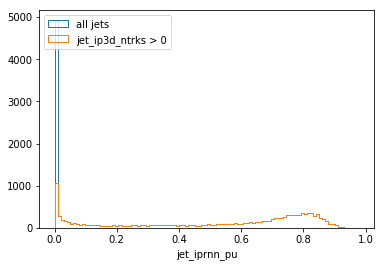

In [6]:
plt.hist(flat_jet_pu,100,label='all jets',histtype='step')
plt.hist(flat_jet_pu[flat_jet_ntrks > 0],100,label='jet_ip3d_ntrks > 0',histtype='step')
plt.legend(loc='upper left')
plt.xlabel('jet_iprnn_pu')
plt.show()

In [9]:
disc

array([ 3.7659001, -3.726141 , -2.969218 , ...,        nan, -1.5051174,
       -1.2169274], dtype=float32)

In [12]:
disc = np.log(flat_jet_pb / (0.93 * flat_jet_pu + 0.07 * flat_jet_pc))

nBins = 100

myRange = (np.min(disc[(flat_jet_ntrks > 0)]),np.max(disc[(flat_jet_ntrks > 0)]))

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [13]:
myRange

(-6.2935724, 9.894302)

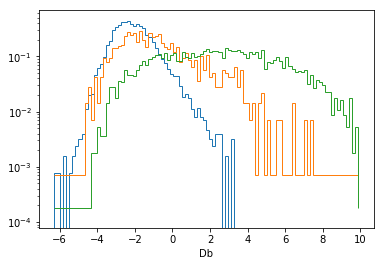

In [14]:
effs = []
for i, pdg in enumerate([0,4,5]):
    
    n, edg, _ = plt.hist(disc[(flat_jet_flav == pdg) & (flat_jet_ntrks > 0)], 
                         nBins,myRange,histtype='step',log=True,density=True)
    effs.append(calculateEff(n))
    
plt.xlabel("Db")
plt.show()

../../plottingFcts.py:616: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


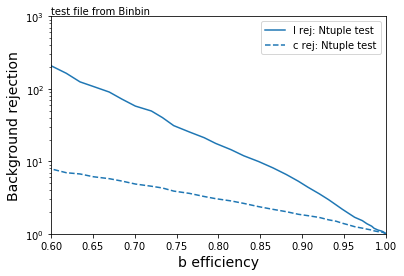

In [15]:
btagROC([effs[2]],[effs[0]],[effs[1]],['Ntuple test'],text="test file from Binbin")